In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
import plotly.express as px
import requests
from datetime import datetime, timedelta
from bs4 import BeautifulSoup

In [2]:
url = 'https://kauno.diena.lt/'

page = requests.get(url)
source = page.content

bs = BeautifulSoup(source, 'html.parser')
# print(bs)

In [3]:
straipsniai = bs.find_all('div', {'class':'category-block-row grid-12 alpha omega unscore'})
print(len(straipsniai))

41


In [4]:
pavadinimai, nuorodos = [], []
for s in straipsniai:
    i = s.find('div', {'class':'articles-list-title-wrapper'})
    if i is not None:
        t = i.find('a', {'class':'articles-list-title'})
        print('::REM::')
        print(t)
        print('HREF?')
        print(t['href'])
        print(t.text)
        pavadinimai.append(t.text)
        nuorodos.append(t['href'])

::REM::
<a class="articles-list-title" href="naujienos/lietuva/politika/lietuva-renka-nauja-valdzia-apylinkes-uzsidare-skaiciuojami-balsai-1195621" style="font-size: 16px;line-height: 1.2;margin-bottom: 10px;display: inline;">2024-ųjų Seimo rinkimai: laimėjo socdemai, antri – TS-LKD, treti – „Nemuno Aušra“ </a>
HREF?
naujienos/lietuva/politika/lietuva-renka-nauja-valdzia-apylinkes-uzsidare-skaiciuojami-balsai-1195621
2024-ųjų Seimo rinkimai: laimėjo socdemai, antri – TS-LKD, treti – „Nemuno Aušra“ 
::REM::
<a class="articles-list-title" href="naujienos/lietuva/politika/laukia-kova-vienmandatese-aiskeja-i-antraji-tura-pateke-kandidatai-1195683" style="font-size: 16px;line-height: 1.2;margin-bottom: 10px;display: inline;">Į antrąjį Seimo rinkimų turą patekę kandidatai <span style="color:red;">(apžvalga)</span></a>
HREF?
naujienos/lietuva/politika/laukia-kova-vienmandatese-aiskeja-i-antraji-tura-pateke-kandidatai-1195683
Į antrąjį Seimo rinkimų turą patekę kandidatai (apžvalga)
::REM::
<a

In [5]:
print(len(pavadinimai))
print(len(nuorodos))

29
29


In [6]:
zodziai=0
zodziukiekiai=[]
for p in pavadinimai:
    zodziai=zodziai + len(p.split())
    zodziukiekiai.append(len(p.split()))
    
print('vidutinis žodžių kiekis straipsnio pavadinime', round(zodziai/len(pavadinimai),2))
print(zodziukiekiai)

vidutinis žodžių kiekis straipsnio pavadinime 8.52
[12, 8, 7, 10, 10, 8, 8, 9, 10, 8, 8, 11, 7, 9, 6, 12, 13, 11, 6, 7, 7, 7, 7, 5, 9, 14, 3, 8, 7]


In [7]:
zodziuzodynas={}
for k in zodziukiekiai:
    if k in zodziuzodynas:
        zodziuzodynas[k] += 1
    else:
        zodziuzodynas[k] = 1

zodziuzodynas = {key: zodziuzodynas[key] for key in sorted(zodziuzodynas)}
print(zodziuzodynas)

{3: 1, 5: 1, 6: 2, 7: 7, 8: 6, 9: 3, 10: 3, 11: 2, 12: 2, 13: 1, 14: 1}


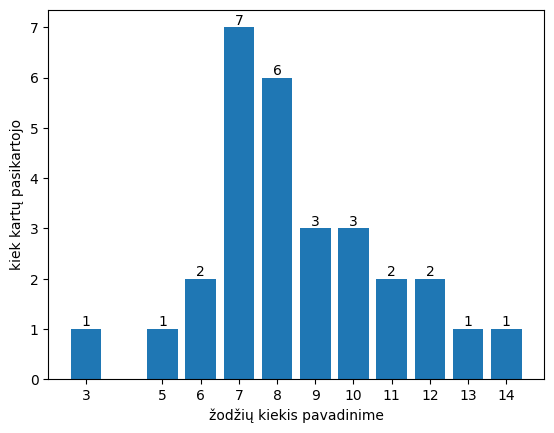

In [8]:
fig, axis = plt.subplots()

a=axis.bar(zodziuzodynas.keys(), zodziuzodynas.values())
axis.bar_label(a)
axis.set_xticks(list(zodziuzodynas.keys()))
axis.set_xlabel('žodžių kiekis pavadinime')
axis.set_ylabel('kiek kartų pasikartojo')
plt.show()

In [9]:
ilgiausias=0
for i in range(0, len(zodziukiekiai)):
    if zodziukiekiai[i] > ilgiausias:
        ilgiausias = i

print(ilgiausias)
print(pavadinimai[ilgiausias])
print(nuorodos[ilgiausias])

15
„Kauno dienos“ studijoje – istorikas R. Kamuntavičius: ar reikia bijoti gudiško litvinizmo?
naujienos/kauno-dienos-studija/kauno-dienos-studijoje-istorikas-r-kamuntavicius-ar-reikia-bijoti-gudisko-litvinizmo-1195490


In [10]:
url = "https://kauno.diena.lt/"+nuorodos[ilgiausias]


page = requests.get(url)
source = page.content

bs = BeautifulSoup(source, 'html.parser')

straipsniai = bs.find('span', {'itemprop':'articleBody'})
print(len(straipsniai))


12


In [11]:
straip=straipsniai.text
straip=straip.split()


In [12]:
zodziaistraip={}

for k in straip:
    if k in zodziaistraip:
        zodziaistraip[k] += 1
    else:
        zodziaistraip[k] = 1

zodziaistraip = dict(sorted(zodziaistraip.items(), key=lambda item: item[1], reverse=True))
zodziaistraip5=dict(list(zodziaistraip.items())[:5])
print(zodziaistraip5)

{'ir': 4, 'su': 3, 'mūsų': 3, 'istorijos': 3, 'tokį': 2}


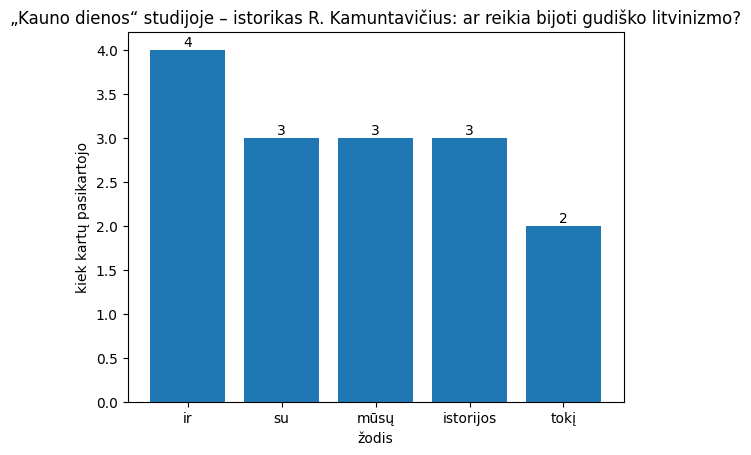

In [13]:
fig, axis = plt.subplots()

a=axis.bar(zodziaistraip5.keys(), zodziaistraip5.values())
axis.bar_label(a)
axis.set_xticks(list(zodziaistraip5.keys()))
axis.set_xlabel('žodis')
axis.set_ylabel('kiek kartų pasikartojo')
plt.title(pavadinimai[ilgiausias])
plt.show()

In [14]:
visozodziu=0
failas=0
for nuor in nuorodos:
    url = "https://kauno.diena.lt/"+nuor
    page = requests.get(url)
    source = page.content
    bs = BeautifulSoup(source, 'html.parser')
    straipsniai = bs.find_all('span', {'itemprop':'articleBody'})
    
    if straipsniai:
        straip=straipsniai[0].text
        straip=straip.split()
    
        visozodziu=visozodziu + len(straip)
    else:
        print(url)
        failas=failas+1
    

print(visozodziu/(len(nuorodos)-1))


https://kauno.diena.lt/https://www.diena.lt/naujienos/vilnius/nusikaltimai-ir-nelaimes/vilniaus-policija-aiskinasi-kas-pavoge-lagamina-1195812
610.5357142857143


In [15]:
print(type(straipsniai))

<class 'bs4.element.ResultSet'>
